In [1]:
import cirq

In [2]:
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

In [3]:
q3 = cirq.LineQubit(3)

In [4]:
q0, q1, q2 = cirq.LineQubit.range(3)

In [5]:
q4_5 = cirq.GridQubit(4, 5)

In [6]:
qubits = cirq.GridQubit.square(4)

In [9]:
qubits

[cirq.GridQubit(0, 0),
 cirq.GridQubit(0, 1),
 cirq.GridQubit(0, 2),
 cirq.GridQubit(0, 3),
 cirq.GridQubit(1, 0),
 cirq.GridQubit(1, 1),
 cirq.GridQubit(1, 2),
 cirq.GridQubit(1, 3),
 cirq.GridQubit(2, 0),
 cirq.GridQubit(2, 1),
 cirq.GridQubit(2, 2),
 cirq.GridQubit(2, 3),
 cirq.GridQubit(3, 0),
 cirq.GridQubit(3, 1),
 cirq.GridQubit(3, 2),
 cirq.GridQubit(3, 3)]

In [11]:
print(cirq.google.Foxtail)

(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


In [12]:
not_gate = cirq.CCNOT
pauli_z = cirq.Z

In [13]:
sqrt_x_gate = cirq.X**0.5
sqrt_iswap = cirq.ISWAP**0.5

In [15]:
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

In [16]:
q0, q1 = cirq.LineQubit.range(2)
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = sqrt_iswap(q0, q1)

In [17]:
circuit = cirq.Circuit()

circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))

In [18]:
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [19]:
print(cirq.Circuit(cirq.SWAP(q, q+1) for q in cirq.LineQubit.range(3)))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


In [20]:
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


In [21]:
q0 = cirq.GridQubit(0, 0)
q1 = cirq.GridQubit(0, 1)
q2 = cirq.GridQubit(0, 2)
adjacent_op = cirq.CZ(q0, q1)
nonadjacent_op = cirq.CZ(q0, q2)

In [22]:
free_circuit = cirq.Circuit()

In [23]:
free_circuit.append(adjacent_op)
free_circuit.append(nonadjacent_op)
print('Unconstrained device:')
print(free_circuit)
print()

Unconstrained device:
(0, 0): ───@───@───
           │   │
(0, 1): ───@───┼───
               │
(0, 2): ───────@───



In [24]:
print('Foxtail device:')
foxtail_circuit = cirq.Circuit(device=cirq.google.Foxtail)
foxtail_circuit.append(adjacent_op)
try:
    foxtail_circuit.append(nonadjacent_op)
except ValueError as e:
    print('Not allowed. %s' % e)

Foxtail device:
Not allowed. Non-local interaction: cirq.CZ(cirq.GridQubit(0, 0), cirq.GridQubit(0, 2)).


In [25]:
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0, q1))

In [26]:
s = cirq.Simulator()

print('Simulate the circuit:')
results = s.simulate(bell_circuit)
print(results)
print()

Simulate the circuit:
measurements: (no measurements)
output vector: 0.707|00⟩ + 0.707|11⟩



In [27]:
bell_circuit.append(cirq.measure(q0, q1, key='result'))

print('Sample the circuit:')
samples = s.run(bell_circuit, repetitions=1000)
print(samples.histogram(key='result'))

Sample the circuit:
Counter({0: 509, 3: 491})


In [28]:
print(bell_circuit)

0: ───H───@───M('result')───
          │   │
1: ───────X───M─────────────


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import sympy

In [32]:
q = cirq.GridQubit(1, 1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'), cirq.measure(q, key='m'))

In [33]:
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

In [34]:
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

In [36]:
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]

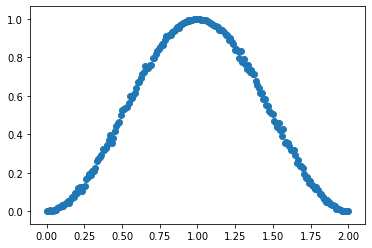

In [37]:
plt.scatter('t', 'p', data={'t': x_data, 'p': y_data})

In [40]:
len(list(param_sweep))

200

In [41]:
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [42]:
print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [43]:
print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.Z(q0), cirq.SWAP(q0, q1))))

Unitary of a sample circuit
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j -1.+0.j -0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j -1.+0.j]]


In [44]:
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(exponent=1.0, global_shift=-0.25).on(cirq.LineQubit(0))]


In [45]:
q0, q1, q2 = cirq.LineQubit.range(3)
print(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

0: ───T────────────────@─────────────────────────────────@─────────────────────────────@────────────────────────────@───────────────────────────────────────
                       │                                 │                             │                            │
1: ───T───────Y^-0.5───@───Y^0.5────@───T^-1────Y^-0.5───@────────Y^0.5───@───Y^-0.5───@──────Y^0.5────@───Y^-0.5───@──────Y^0.5────@───────────────────────
                                    │                                     │                            │                            │
2: ───Y^0.5───X────────T───Y^-0.5───@───Y^0.5───T────────Y^-0.5───────────@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5───Y^0.5───X───


In [46]:
swap = cirq.SWAP(cirq.GridQubit(0, 0), cirq.GridQubit(0, 1))
print(cirq.Circuit(swap, device=cirq.google.Foxtail))

(0, 0): ───Y^-0.5───@───S^-1───Y^0.5───X^0.5───@───S^-1───X^-0.5───@───S^-1───
                    │                          │                   │
(0, 1): ───Y^-0.5───@───S^-1───Y^0.5───X^0.5───@───S^-1───X^-0.5───@───S^-1───


In [47]:
q = cirq.GridQubit(1, 1)
optimizer = cirq.MergeSingleQubitGates()

In [ ]:
c = cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.)